In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Change the path to where your file is stored
file_path = '/content/drive/MyDrive/Codrelate 2025 Problem Statement/AI-Powered Content Analysis and Recommendation.csv'

df = pd.read_csv(file_path)
df.head()


,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs, HTML tags, non-alphabetical characters
    text = re.sub(r"http\S+|www\S+|<.*?>|[^a-zA-Z ]", "", str(text))
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Apply cleaning to both title and text columns
df['cleaned_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

df[['title', 'text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,cleaned_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,mental note vol photo josh riemer unsplashmerr...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,brain coronavirus brain coronavirusa guide cur...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,mind nose mind nosehow smell training change b...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,purposes dreams passionate synergy science tec...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",surviving rod head youve heard havent phineas ...


In [5]:
import pandas as pd

# Take a 200-row stratified sample if it's big, or use full data if small
df_sample = df.sample(n=200, random_state=42)


In [6]:
from sentence_transformers import SentenceTransformer

# Load the pretrained MiniLM model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert cleaned text into dense vector representations
X = model.encode(df_sample['text'].tolist(), show_progress_bar=True, batch_size=16)

print(f"Vectorized shape: {X.shape}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

Vectorized shape: (200, 384)


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert tags column from string to list (if not already a list)
df_sample['tags'] = df_sample['tags'].apply(eval)

# Binarize the tags
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_sample['tags'])


In [8]:
from sentence_transformers import SentenceTransformer

# Load the model (this downloads and caches it)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the text data into vectors (X)
X = model.encode(df_sample['text'].tolist(), show_progress_bar=True)

# 'y' is your multi-label binary matrix from earlier


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

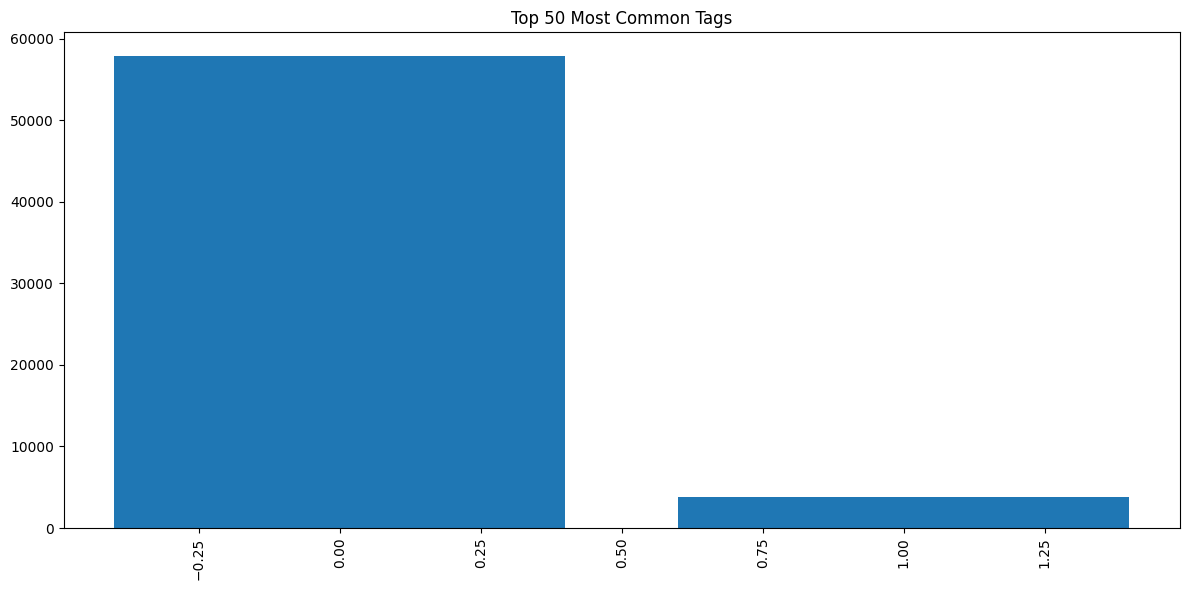

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of tags
flat_tags = [tag[0] if isinstance(tag, (list, np.ndarray)) else tag for tag in y_train]

tag_counts = Counter(flat_tags)

# Plot top 50 most common tags
plt.figure(figsize=(12, 6))
plt.bar(*zip(*tag_counts.most_common(50)))
plt.xticks(rotation=90)
plt.title("Top 50 Most Common Tags")
plt.tight_layout()
plt.show()


In [10]:
flat_tags = [tag for tags in y_train for tag in tags]  # flatten list of lists
tag_counts = Counter(flat_tags)


In [11]:
print(type(y_train))
print(y_train[:5])


<class 'numpy.ndarray'>
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


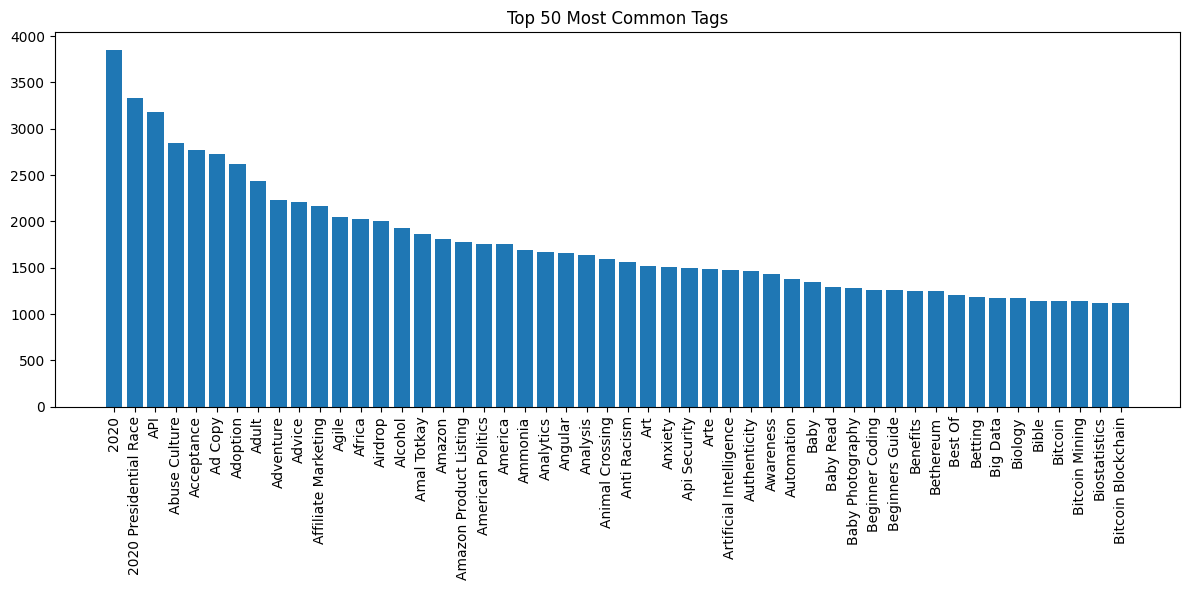

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Assuming y_train is your multi-hot encoded NumPy array
# And `mlb` is your MultiLabelBinarizer that you used for encoding

tag_sums = np.sum(y_train, axis=0)  # sum over rows to count tag frequency
tag_names = mlb.classes_  # Get tag names in order

# Create a dictionary of tag:count
tag_counts = dict(zip(tag_names, tag_sums))

# Sort by count
tag_counts = dict(sorted(tag_counts.items(), key=lambda item: item[1], reverse=True))

# Plot top 50
plt.figure(figsize=(12, 6))
top_n = 50
plt.bar(list(tag_counts.keys())[:top_n], list(tag_counts.values())[:top_n])
plt.xticks(rotation=90)
plt.title("Top 50 Most Common Tags")
plt.tight_layout()
plt.show()


In [13]:
# Remove rare tags (optional, but can help with noise)
rare_tags = [tag for tag, count in tag_counts.items() if count < 5]
print("Rare tags to consider removing:", rare_tags)


Rare tags to consider removing: []


In [14]:
plt.savefig("tag_distribution.png")


<Figure size 640x480 with 0 Axes>

In [15]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text


df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')
df['clean_text'] = (df['title'] + " " + df['text']).apply(clean_text)
df_filtered = df[df['tags'].map(lambda x: len(x) > 0)]  # or any filter
df_filtered['clean_text'] = (df_filtered['title'] + " " + df_filtered['text']).apply(clean_text)
X = df_filtered['clean_text']
y = mlb.fit_transform(df_filtered['tags'])  # Make sure this is from df_filtered



In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from collections import Counter
import re
import string

# Load your CSV (update path if needed)
file_path = '/content/drive/MyDrive/Codrelate 2025 Problem Statement/AI-Powered Content Analysis and Recommendation.csv'

df = pd.read_csv(file_path)
# Convert comma-separated tag strings to list (if needed)
df['tags'] = df['tags'].fillna('').apply(lambda x: x.split(','))

# Remove empty tag lists
df = df[df['tags'].apply(lambda x: len(x) > 0)]

# Get top 50 tags
tag_counter = Counter(tag for tags in df['tags'] for tag in tags)
top_50_tags = [tag for tag, _ in tag_counter.most_common(50)]

# Filter articles that contain at least one of the top 50 tags
df = df[df['tags'].apply(lambda tags: any(tag in top_50_tags for tag in tags))]

# Keep only top 50 tags per article
df['tags'] = df['tags'].apply(lambda tags: [tag for tag in tags if tag in top_50_tags])

# Clean the text (simple clean function)
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Combine and clean text
df['clean_text'] = (df['title'].fillna('') + ' ' + df['text'].fillna('')).apply(clean_text)

# Encode tags using MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=top_50_tags)
y = mlb.fit_transform(df['tags'])

# Final inputs
X = df['clean_text']

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data processing complete!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ Data processing complete!
X_train shape: (61722,)
y_train shape: (61722, 50)


In [1]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00


In [2]:
def predict_tags(text):
    # Transform the input text
    text_tfidf = tfidf.transform([text])

    # Predict using your model
    pred = model.predict(text_tfidf)

    # Decode prediction to tags
    tags = mlb.inverse_transform(pred)

    return tags[0] if tags and tags[0] else ["No relevant tags found 😅"]


In [3]:
import gradio as gr

demo = gr.Interface(
    fn=predict_tags,
    inputs=gr.Textbox(lines=10, placeholder="Paste your article or content here..."),
    outputs=gr.Label(num_top_classes=5),
    title="🔍 AI-Powered Tag Recommendation",
    description="Paste your article text below and get smart tag suggestions using our machine learning model trained on real-world content.",
    theme="soft"  # Optional, aesthetic
)

demo.launch(share=True)  # 🔥 This gives you a public link for demo


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bfff022fcfcec10c2e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
